<a href="https://colab.research.google.com/github/Saksham008/Machine-Learning-Based-Heart-Disease-Prediction/blob/main/MachineLearning_BasedHeartDiseasePredictionSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go

import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error
import plotly.offline as pyo

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
heart=pd.read_csv('/content/drive/MyDrive/HeartDiseaseData/heart1.csv')

In [ ]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,airq
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,212
1,53,1,0,140,212,1,0,155,1,3.1,0,0,3,0,212
2,70,1,0,145,212,0,1,125,1,2.6,0,0,3,0,212
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,203
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,221
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,258
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,275
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,254


In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect","air quality"]

for i in range(len(info)):
    if i < len(heart.columns):
        print(heart.columns[i] + ":\t\t\t" + info[i])
    else:
        print("Extra info:\t\t\t" + info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
target:			air quality


In [ ]:
heart['target']

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [ ]:
heart.groupby('target').size()

target
0    499
1    526
dtype: int64

In [ ]:
heart.groupby('target').sum()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,airq
target,,,,,,,,,,,,,,
0,28228,413,241,66919,125442,82,228,69426,274,798.5,582,578,1267,125442
1,27567,300,725,67983,126755,71,315,83416,71,299.8,838,195,1115,126755


In [ ]:
heart.shape

(1025, 15)

In [ ]:
heart.size

15375

In [ ]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,airq
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.045854,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171,246.045854
std,9.072290,0.460373,1.029641,17.516718,51.547790,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070,51.547790
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,211.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,240.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000,275.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,564.000000


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
 14  airq      1025 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 120.2 KB


In [ ]:
heart['target'].unique()

array([0, 1])

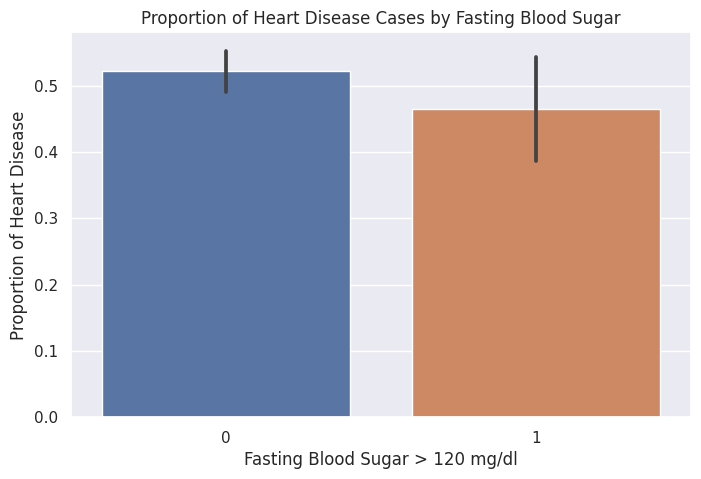

In [ ]:
sns.barplot(x="fbs", y="target", data=heart)
plt.xlabel('Fasting Blood Sugar > 120 mg/dl')
plt.ylabel('Proportion of Heart Disease')
plt.title('Proportion of Heart Disease Cases by Fasting Blood Sugar')
plt.show()

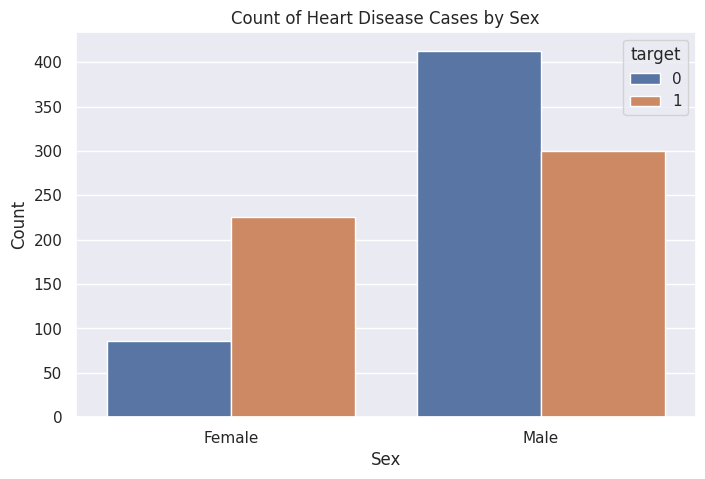

In [ ]:
sns.countplot(x='sex', hue='target', data=heart)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Count of Heart Disease Cases by Sex')
plt.show()

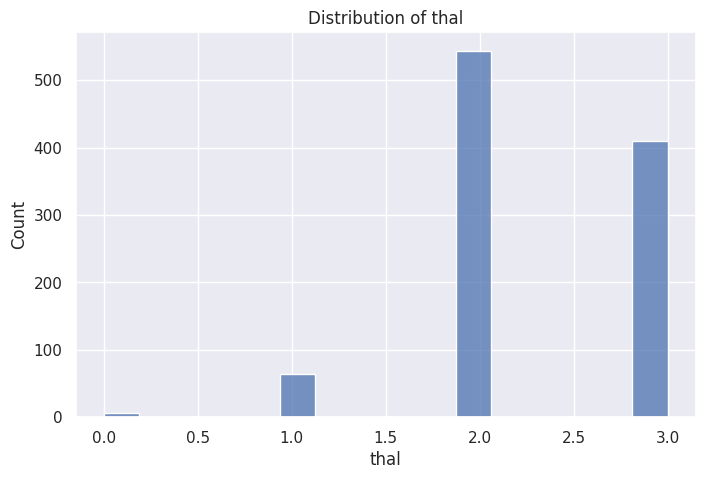

In [ ]:
sns.histplot(heart["thal"])
plt.xlabel("thal")
plt.ylabel("Count")
plt.title("Distribution of thal")
plt.show()

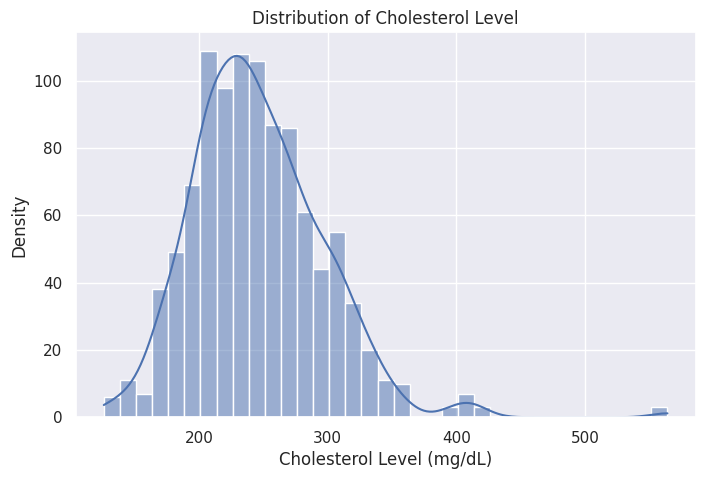

In [ ]:
sns.histplot(heart["chol"], kde=True)
plt.xlabel("Cholesterol Level (mg/dL)")
plt.ylabel("Density")
plt.title("Distribution of Cholesterol Level")
plt.show()

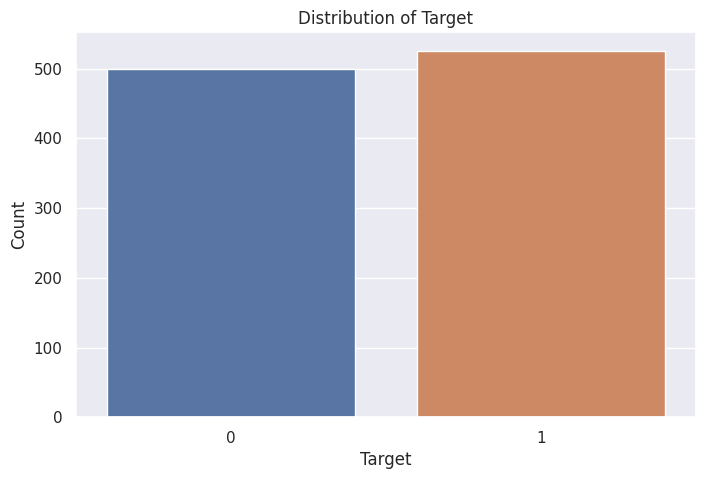

1    526
0    499
Name: target, dtype: int64


In [ ]:
sns.countplot(x="target", data=heart)
plt.xlabel("Target")
plt.ylabel("Count")
plt.title("Distribution of Target")
plt.show()

target_temp = heart["target"].value_counts()
print(target_temp)

In [ ]:
#DATA Preprocessing
########################################################################################
heart['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
heart['target'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1020    False
1021    False
1022    False
1023    False
1024    False
Name: target, Length: 1025, dtype: bool

In [ ]:
heart['target'].unique()

array([0, 1])

In [ ]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
airq        0
dtype: int64

In [ ]:
X,y=heart,heart.target
X.drop('target',axis=1,inplace=True)
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()# Create an instance of the StandardScaler class
X = sc.fit_transform(X)  # Perform feature scaling on the feature data X
#X refers to the feature data that you want to standardize or scale using the StandardScaler class from scikit-learn (sklearn).

#In machine learning, X typically represents the feature matrix or the independent variables


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)

In [ ]:
X_test

array([[ 0.28296121,  0.66150409, -0.91575542, ...,  0.23862459,
         1.08985168,  0.54256046],
       [ 1.05491812,  0.66150409,  1.99930453, ..., -0.73197147,
        -0.52212231, -0.68020301],
       [ 1.71659547,  0.66150409, -0.91575542, ...,  2.17981673,
        -0.52212231,  1.47418976],
       ...,
       [ 1.27547724,  0.66150409, -0.91575542, ..., -0.73197147,
        -2.1340963 , -0.35025096],
       [-0.04787747,  0.66150409,  1.02761788, ..., -0.73197147,
         1.08985168,  0.23201736],
       [ 1.38575679,  0.66150409, -0.91575542, ...,  1.20922066,
         1.08985168,  0.15438158]])

In [ ]:
y_test

620    0
181    1
546    0
618    1
822    0
      ..
964    1
242    1
757    1
157    1
999    0
Name: target, Length: 308, dtype: int64

In [ ]:
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (717, 14)
train_set_y shape: (717,)
test_set_x shape: (308, 14)
test_set_y shape: (308,)


In [ ]:
# Model
# Decision Tree Classifier
scores_dict = {
    0: 'You do not have a heart disease.',
    1: 'You have heart disease.'
}



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [ ]:
prediction=dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, prediction) * 100
precision_dt = precision_score(y_test, prediction)
auc_roc_dt = roc_auc_score(y_test, prediction)
f1_score_dt = f1_score(y_test, prediction)

In [ ]:
scores_dict['DecisionTreeClassifier'] = accuracy_dt
print("Accuracy: {:.2f}%".format(accuracy_dt))
print("Precision: {:.2f}".format(precision_dt))
print("AUC-ROC Score: {:.2f}".format(auc_roc_dt))
print("F1-Score: {:.2f}".format(f1_score_dt))


Accuracy: 98.70%
Precision: 0.97
AUC-ROC Score: 0.99
F1-Score: 0.99


In [ ]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.987


In [ ]:
X_DT=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1,124]])
X_DT_prediction=dt.predict(X_DT)

In [ ]:
predicted_label = X_DT_prediction[0]
print(predicted_label)


0


In [ ]:
print(scores_dict[int(X_DT_prediction[0])])


You do not have a heart disease.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score

In [ ]:
k_range = range(1, 26)
scores = {}
h_score = 0       # to find the best score
best_k = 0        # to find the best k
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    prediction_knn = knn.predict(X_test)
    scores[k] = accuracy_score(y_test, prediction_knn)
    if scores[k] > h_score:
        h_score = scores[k]
        best_k = k

    scores_list.append(accuracy_score(y_test, prediction_knn))

print('The best value of k is {} with score: {}'.format(best_k, h_score))

The best value of k is 1 with score: 0.9512987012987013


In [ ]:
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
prediction_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100
precision_knn = precision_score(y_test, prediction_knn)
auc_roc_knn = roc_auc_score(y_test, prediction_knn)
f1_score_knn = f1_score(y_test, prediction_knn)


In [ ]:
print('Accuracy Score: {:.2f}%'.format(accuracy_knn))
print('Precision Score: {:.2f}'.format(precision_knn))
print('AUC-ROC Score: {:.2f}'.format(auc_roc_knn))
print('F1-Score: {:.2f}'.format(f1_score_knn))

scores_dict['KNeighborsClassifier'] = accuracy_knn

Accuracy Score: 95.13%
Precision Score: 0.95
AUC-ROC Score: 0.95
F1-Score: 0.95


In [ ]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.951


In [ ]:
X_knn=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1,12]])
X_knn=sc.transform(X_knn)
X_knn_prediction=dt.predict(X_knn)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [ ]:
X_knn

array([[ 0.94463856,  0.66150409,  1.99930453,  0.76468824, -0.25320624,
         2.38733039, -1.00404855,  0.03852459, -0.71228712,  1.04598451,
        -2.24367514, -0.73197147, -2.1340963 , -4.54258283]])

In [ ]:
(X_knn_prediction[0])

1

In [ ]:
print(scores_dict[int(X_knn_prediction[0])])

You have heart disease.


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score

lg = LGBMClassifier(boosting_type='gbdt', n_estimators=5000, learning_rate=0.05, objective='binary', metric='accuracy',
                    is_unbalance=True, colsample_bytree=0.7, reg_lambda=3, reg_alpha=3, random_state=500, n_jobs=-1,
                    num_leaves=35)
lg.fit(X_train, y_train)
ypred = lg.predict(X_test)

accuracy_lg = accuracy_score(y_test, ypred) * 100
precision_lg = precision_score(y_test, ypred)
auc_roc_lg = roc_auc_score(y_test, ypred)
f1_score_lg = f1_score(y_test, ypred)

print('Accuracy Score: {:.2f}%'.format(accuracy_lg))
print('Precision Score: {:.2f}'.format(precision_lg))
print('AUC-ROC Score: {:.2f}'.format(auc_roc_lg))
print('F1-Score: {:.2f}'.format(f1_score_lg))

scores_dict['LGBMClassifier'] = accuracy_lg


Accuracy Score: 90.91%
Precision Score: 0.92
AUC-ROC Score: 0.91
F1-Score: 0.91


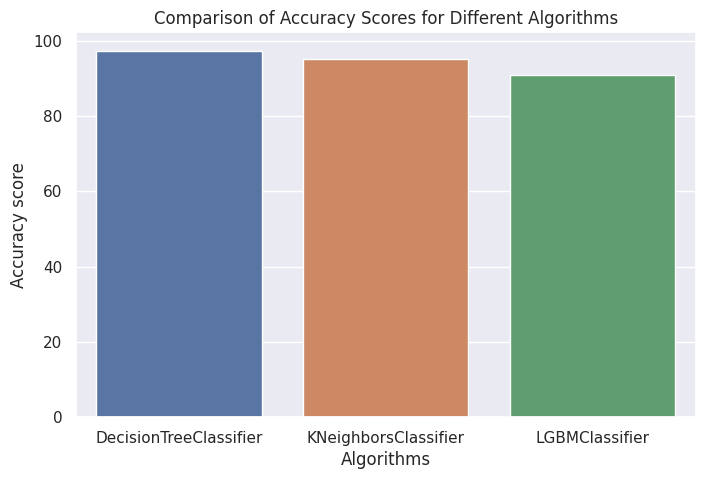

In [ ]:
scores_dict = {
    'DecisionTreeClassifier':97.40 ,
    'KNeighborsClassifier': 95.13,
    'LGBMClassifier': 90.91,
}

algo_name = list(scores_dict.keys())
scoress = list(scores_dict.values())

sns.set(rc={'figure.figsize': (8, 5)})
sns.barplot(x=algo_name, y=scoress)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.title("Comparison of Accuracy Scores for Different Algorithms")

plt.show()

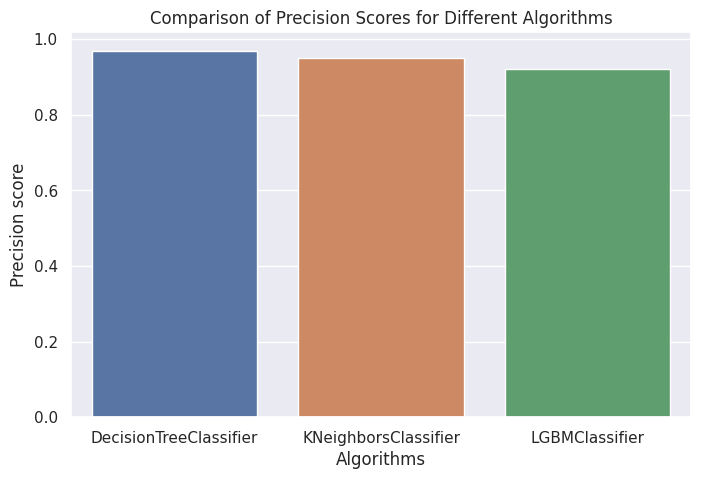

In [ ]:
scores_dict = {
    'DecisionTreeClassifier':0.97 ,
    'KNeighborsClassifier': 0.95,
    'LGBMClassifier': 0.92,
}

algo_name = list(scores_dict.keys())
scoress = list(scores_dict.values())

sns.set(rc={'figure.figsize': (8, 5)})
sns.barplot(x=algo_name, y=scoress)
plt.xlabel("Algorithms")
plt.ylabel("Precision score")
plt.title("Comparison of Precision Scores for Different Algorithms")

plt.show()

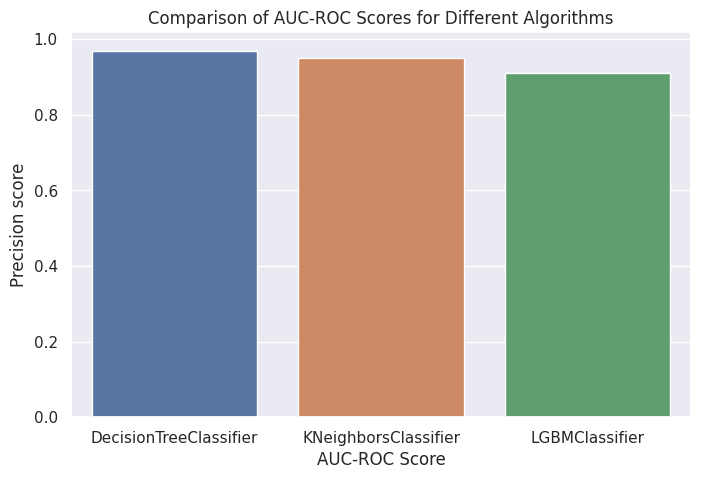

In [ ]:
scores_dict = {
    'DecisionTreeClassifier':0.97 ,
    'KNeighborsClassifier': 0.95,
    'LGBMClassifier': 0.91,
}

algo_name = list(scores_dict.keys())
scoress = list(scores_dict.values())

sns.set(rc={'figure.figsize': (8, 5)})
sns.barplot(x=algo_name, y=scoress)
plt.xlabel("AUC-ROC Score")
plt.ylabel("Precision score")
plt.title("Comparison of AUC-ROC Scores for Different Algorithms")

plt.show()

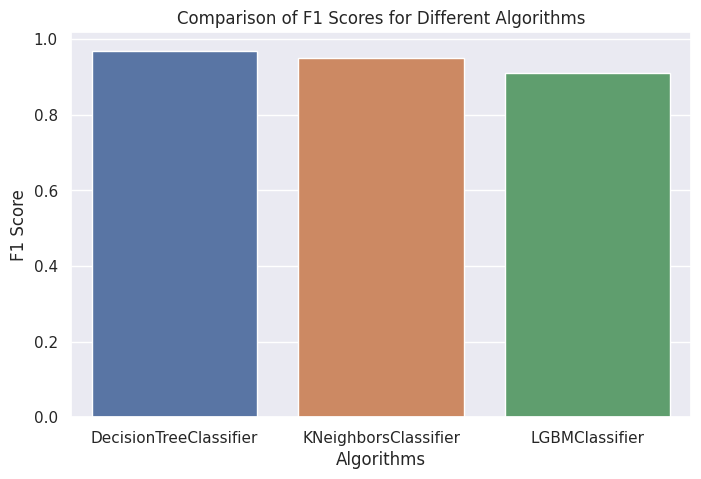

In [ ]:
scores_dict = {
    'DecisionTreeClassifier':0.97 ,
    'KNeighborsClassifier': 0.95,
    'LGBMClassifier': 0.91,
}

algo_name = list(scores_dict.keys())
scoress = list(scores_dict.values())

sns.set(rc={'figure.figsize': (8, 5)})
sns.barplot(x=algo_name, y=scoress)
plt.xlabel("Algorithms")
plt.ylabel("F1 Score")
plt.title("Comparison of F1 Scores for Different Algorithms")

plt.show()